In [1]:
import numpy as np
import matplotlib.pyplot as plt

### part (a)
Load the dataset pca-data-3d.txt, center it, and show the scatter plot matrix.

In [2]:
data = []
with open('pca-data-3d.txt', 'r') as f:
    lines = f.readlines()[1:]
    for line in lines:
        k = line.split('\n')[0]
        j = k.split(',')
        data.append([float(a) for a in j])
data = np.array(data)

In [3]:
c_data = data - np.mean(data,axis=0)
c_data

array([[-0.23781794,  0.13161615, -0.15166948],
       [-0.02320852, -0.47205661, -0.93101129],
       [ 0.78870474,  2.96299299, -2.66632124],
       ...,
       [-1.47638869, -3.57897783,  1.89554422],
       [ 0.75531742,  1.02239699,  2.27175325],
       [ 0.86035587,  1.41898832,  0.87574383]])

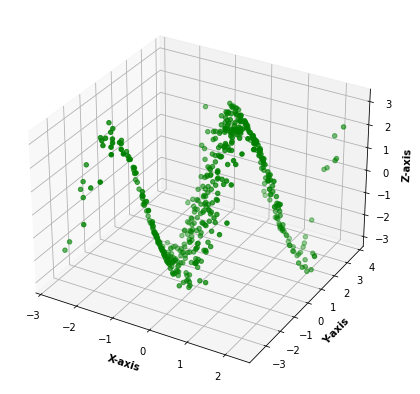

In [4]:
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(c_data[:,0], c_data[:,1], c_data[:,2], color = "green");
ax.set_xlabel('X-axis', fontweight ='bold');
ax.set_ylabel('Y-axis', fontweight ='bold');
ax.set_zlabel('Z-axis', fontweight ='bold');

### part (b) 
Determine the PCs and make the analogous scatter plot matrix for the 2d-coordinate systems spanned by the different pairs of PCs.

In [5]:
# Standardize data
#c_data = c_data/np.std(c_data,axis=0)

In [6]:
# Cov matrix
cov_data = np.cov(c_data.T)

In [7]:
# Eigendecomposition
eigen_val, eigen_vec = np.linalg.eig(cov_data)
print('eigenvalue :\n', eigen_val)
print('\neigenvector :\n', eigen_vec)

eigenvalue :
 [0.38503192 2.24956199 4.4947884 ]

eigenvector :
 [[-0.85087048  0.51120047  0.12121678]
 [ 0.52533684  0.83065188  0.1844957 ]
 [ 0.00637466 -0.22066159  0.9753296 ]]


In [8]:
print('PC3 explains', round(eigen_val[2]/sum(eigen_val)*100), '% of the data')

PC3 explains 63 % of the data


In [14]:
a1 = c_data.dot(eigen_vec[0])
a2 = c_data.dot(eigen_vec[1])
a3 = c_data.dot(eigen_vec[2])

e1 = eigen_vec[0][:,np.newaxis]
e2 = eigen_vec[1][:,np.newaxis]
e3 = eigen_vec[2][:,np.newaxis]

x1 = (a1*e1).T
x2 = (a2*e2).T
x3 = (a3*e3).T

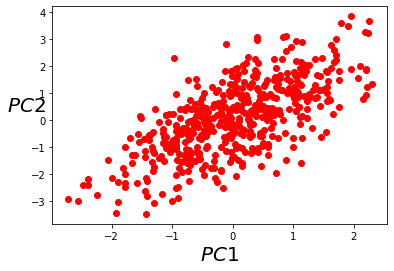

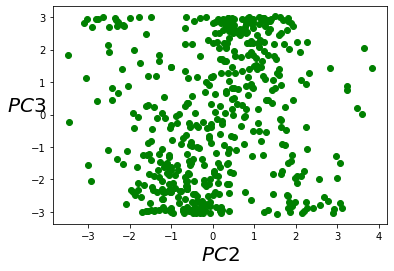

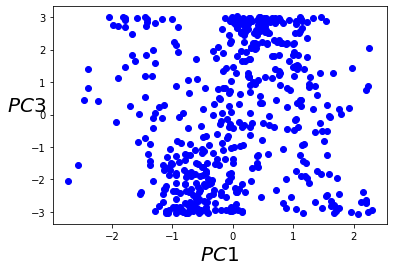

In [11]:
plt.figure(1)
plt.scatter(data[:,0], data[:,1],color='r')
plt.xlabel(r'$PC1$', fontsize=20);
plt.ylabel(r'$PC2$', fontsize=20, rotation='horizontal');
plt.figure(2)
plt.scatter(data[:,1], data[:,2],color='g')
plt.xlabel(r'$PC2$', fontsize=20);
plt.ylabel(r'$PC3$', fontsize=20, rotation='horizontal');
plt.figure(3)
plt.xlabel(r'$PC1$', fontsize=20);
plt.ylabel(r'$PC3$', fontsize=20, rotation='horizontal');
plt.scatter(data[:,0], data[:,2],color='b')


### part (c) 
Examine the 3d-reconstruction of the data in the original coordinate systems when using only (i) the first, (ii) the first two or (iii) all three PCs for reconstruction. Discuss how useful these directions (i.e., the PCs) are.

Text(0.5, 0.92, 'plot 3 PC')

<Figure size 432x288 with 0 Axes>

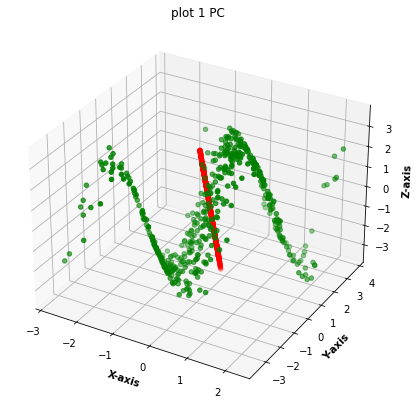

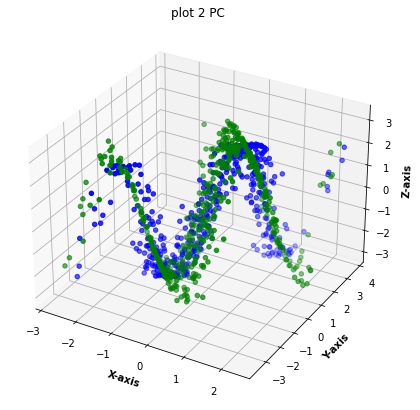

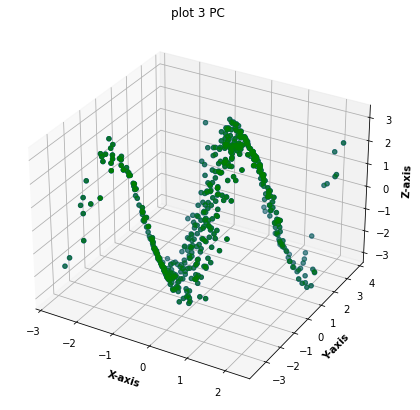

In [36]:
# Creating figure
plt.figure(1)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")

x = x3
ax.scatter3D(x[:,0], x[:,1], x[:,2], color = "r");
ax.scatter3D(c_data[:,0], c_data[:,1], c_data[:,2], color = "green");
ax.set_xlabel('X-axis', fontweight ='bold');
ax.set_ylabel('Y-axis', fontweight ='bold');
ax.set_zlabel('Z-axis', fontweight ='bold');
plt.title('plot 1 PC')

# 
plt.figure(2)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
x = x3+x2
ax.scatter3D(x[:,0], x[:,1], x[:,2], color = "b");
ax.scatter3D(c_data[:,0], c_data[:,1], c_data[:,2], color = "green");
ax.set_xlabel('X-axis', fontweight ='bold');
ax.set_ylabel('Y-axis', fontweight ='bold');
ax.set_zlabel('Z-axis', fontweight ='bold');
plt.title('plot 2 PC')

#
plt.figure(3)
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
x = x1+x2+x3
ax.scatter3D(x[:,0], x[:,1], x[:,2], color = "b");
ax.scatter3D(c_data[:,0], c_data[:,1], c_data[:,2], color = "green");
ax.set_xlabel('X-axis', fontweight ='bold');
ax.set_ylabel('Y-axis', fontweight ='bold');
ax.set_zlabel('Z-axis', fontweight ='bold');
plt.title('plot 3 PC')
